In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

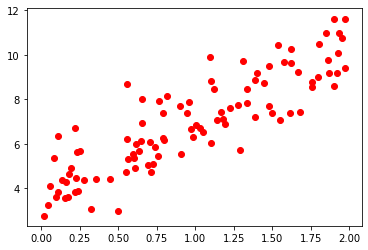

In [9]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.scatter(X, y, color='r')
plt.show()

In [10]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.82621017],
       [3.2207928 ]])

In [14]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82621017],
       [10.26779578]])

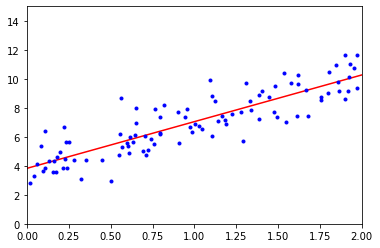

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.82621017]), array([[3.2207928]]))

In [23]:
lin_reg.predict(X_new)

array([[ 3.82621017],
       [10.26779578]])

In [24]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.82621017],
       [3.2207928 ]])

In [30]:
n_epochs = 50
t0, t1 = 5, 10 # learning schedule hyperparameters

def learningSchedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs) :
    for i in range(m):
        randomIndex = np.random.randint(m)
        xi = np.array([X_b[randomIndex]])
        yi = np.array([y[randomIndex]])
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learningSchedule(epoch * m + i)
        theta = theta - eta * gradients

In [31]:
theta

array([[3.86359028],
       [3.2254368 ]])

In [39]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81197246]), array([3.21433635]))

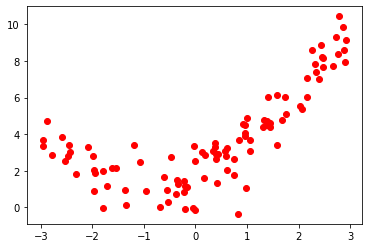

In [47]:
# polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y,c='r')

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.96085964])

In [49]:
X_poly[0]

array([0.96085964, 0.92325125])

In [50]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.80398124]), array([[1.03496051, 0.57448957]]))